# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [48]:
import sys
!{sys.executable} -m pip install sklearn

     |████████████████████████████████| 7.2 MB 5.8 MB/s eta 0:00:01     |████████████                    | 2.7 MB 3.5 MB/s eta 0:00:02
     |████████████████████████████████| 301 kB 7.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=5c763a35e0b0f7e5e0f2fa132d6b6cb670e94e01481720b08589c89efdc1455e
  Stored in directory: /Users/eduardooportoalonso/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8 -m pip install --upgrade pip' command.


In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
# Your code here.
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

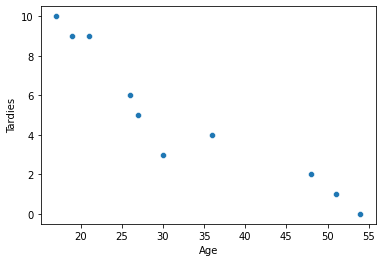

In [7]:
# Your code here.
sns.scatterplot(x=student_data['Age'], y=student_data['Tardies']);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

### Answer
There is a negative relation between the variable Age and the variable Tardies, where the higher the age is, the less the tardies are. Given this, we can say that the older the students are, the less tardies they have.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
# Your response here.
covar = student_data['Age'].cov(student_data['Tardies'])
corr = student_data['Age'].corr(student_data['Tardies'])

print(f"The covariance between Age and Tardies is {round(covar,2)}; its correlation is {round(corr, 2)}")

# By the given values, as both are negative, we can say that there is a definetly a negative relationship between 
# Age and Tardies. But as the correlation value is very close to -1, we can also say that this relationship
# is very strong. 

The covariance between Age and Tardies is -45.57; its correlation is -0.94


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [43]:
student_data_c = student_data.copy()

x_ = student_data_c['Age'].mean()
y_ = student_data_c['Tardies'].mean()

student_data_c['x-x_'] = student_data_c['Age'] - x_
student_data_c['y-y_'] = student_data_c['Tardies'] - y_

student_data_c['(x-x_)(y-y_)'] = student_data_c['x-x_'] * student_data_c['y-y_']
student_data_c['(x-x_)**2'] = student_data_c['x-x_']**2

student_data_c.head(2)

,Age,Tardies,x-x_,y-y_,(x-x_)(y-y_),(x-x_)**2
0,17,10,-15.9,5.1,-81.09,252.81
1,51,1,18.1,-3.9,-70.59,327.61


In [44]:
m = student_data_c['(x-x_)(y-y_)'].sum() / student_data_c['(x-x_)**2'].sum()
b = y_ - m*x_
m, b

# After using the Least Squares method (OLS) for this linear regression model the outcome is -0.24 for the slope (m)
# and 12.89 for the y-intercept (b).

(-0.2428207709159808, 12.888803363135768)

In [45]:
x = range(student_data['Age'].max())
y = m*x + b

Plot your regression model on your scatter plot.

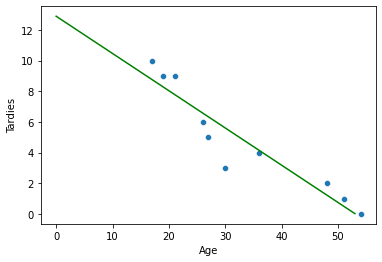

In [46]:
# Your code here.
sns.scatterplot(x=student_data['Age'], y=student_data['Tardies'])
plt.plot(x, y, c="g", label="Best line")

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [55]:
# Your response here.
student_data_c["y_pred"] = [(m*age + b) for age in student_data_c['Age']]
student_data_c["y_pred-y_"] = student_data_c["y_pred"] - y_

r2 = (student_data_c["y_pred-y_"]**2).sum()/(student_data_c["y-y_"]**2).sum()
r2

# By the coefficient of determination (> 80%), we can say our fit is between good and great, so we can trust in our 
# predicted model; and by the given data we can also say that age is a good predictor of tardiness.

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [56]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [73]:
# Your response here. 
pd.concat([vehicles.cov()['CO2 Emission Grams/Mile'], vehicles.corr()['CO2 Emission Grams/Mile']], 
           axis=1, 
           keys=['Covariance', 'Correlation']).drop(['CO2 Emission Grams/Mile', 
                                                     'Engine Displacement', 
                                                     'City MPG',
                                                     'Highway MPG'])

# By the correlation values on the dataframe, we can say the variable that will be the most important in determining 
# Co2 emissions will be 'Fuel Barrels/Year', as it is really close to 1. Other variables as 'Fuel Cost/Year', 
# or 'Combined MPG' could also be important.

# On the other hand the least helpful variable will be 'Year', as its correlation value is closer to 0 than any other.

,Covariance,Correlation
Year,-266.928999,-0.222300
Cylinders,157.237699,0.752393
Fuel Barrels/Year,524.532182,0.986189
Combined MPG,-563.783910,-0.926229
Fuel Cost/Year,56185.983710,0.930865


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [92]:
# Your response here. 
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles[['CO2 Emission Grams/Mile']]

lm = LinearRegression(fit_intercept=True)
lm.fit(X,y)

intercept = lm.intercept_
coefficients = lm.coef_

y_pred = lm.predict(X)
r2 = r2_score(y_pred=y_pred, y_true=y)

rmse = mean_squared_error(y_pred=y_pred, y_true=y)**.5

# This is a Multiple Linear Regression model

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [109]:
# Your response here.
print(f'- Intercept = {intercept[0]}')
print('- Coefficients:')
for i, c in zip(X.columns, coefficients[0]):
    print(f"    * {i}: {c}")
print(f"- R-square: {r2}")
print(f"- Mean Squared Error: {rmse}")

# From the summary we can say that the independent variables that make our dependent change the most are 
# Fuel Barrels/Year and Combined MPG, two of the variables I pointed above by its correlation.

# We can feel really confident about our model, as its r-squared value is really close to 1.

- Intercept = 769.888283646565
- Coefficients:
    * Year: -0.32061673151874504
    * Cylinders: 1.8787997557940583
    * Fuel Barrels/Year: 19.052925065031577
    * Combined MPG: -3.0403993802127887
    * Fuel Cost/Year: 0.032309478941384695
- R-square: 0.9808734920269122
- Mean Squared Error: 16.46571149602408


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 